# imports

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import pandas as pd
import csv
import heartbeat as hb
import preparation_hypno as preph
import preparation_edf as prepedf
import neurokit2 as nk
import matplotlib.pyplot as plt
from preparation_hypno import System
from edfrd import read_header, read_data_records
from datetime import time
from datetime import datetime
from datetime import date
from datetime import timedelta
import edfrd
from neurokit2.hrv.hrv_utils import _hrv_get_rri

In [4]:
plt.rcParams.update({'figure.max_open_warning': 0})

# allocate variables

In [5]:
#Probanden ID
idp = '000'
filename = "Probanden/Alice5/stadium002/STADIUManonym.csv"
night = '1'
dia = 'NT1'

In [6]:
dfh = preph.make_df_hypno_all(filename, System.Alice)

In [7]:
dfh

Time Stadium
0      22:37:30    Wach
1      22:37:31    Wach
2      22:37:32    Wach
3      22:37:33    Wach
4      22:37:34    Wach
...         ...     ...
26514  05:59:24    Wach
26515  05:59:25    Wach
26516  05:59:26    Wach
26517  05:59:27    Wach
26518  05:59:28    Wach

[26519 rows x 2 columns]

In [8]:
#öffnen der EDF

In [9]:
#header aus der EDF lesen

In [32]:
file_path = 'Probanden/Alice5/24.08.2016_anon.edf'
header = read_header(file_path)
header

Header(version='0', local_patient_identification='', local_recording_identification='', startdate_of_recording='00.00.00', starttime_of_recording='22.37.30', number_of_bytes_in_header_record=6144, reserved=None, number_of_data_records=26569, duration_of_a_data_record=1, number_of_signals=23, signals=(SignalHeader(label='EEG F3-A2', transducer_type='', physical_dimension='uV', physical_minimum=-300.0, physical_maximum=300.0, digital_minimum=0, digital_maximum=1023, prefiltering='', nr_of_samples_in_each_data_record=200, reserved=None), SignalHeader(label='EEG C3-A2', transducer_type='', physical_dimension='uV', physical_minimum=-300.0, physical_maximum=300.0, digital_minimum=0, digital_maximum=1023, prefiltering='', nr_of_samples_in_each_data_record=200, reserved=None), SignalHeader(label='EEG O1-A2', transducer_type='', physical_dimension='uV', physical_minimum=-300.0, physical_maximum=300.0, digital_minimum=0, digital_maximum=1023, prefiltering='', nr_of_samples_in_each_data_record=20

In [11]:
ecg_channel, fs = prepedf.get_ecg_channel_and_frequency(file_path)

# Calculation cutpoints from seperate hypnogram

In [12]:
#cutpoints wo das Schlafstadium wechselt

In [13]:
cutpoints = preph.calculate_cutpoints(dfh)
cutpoints

Time Stadium
0   22:37:30    Wach
1   22:53:00      N1
2   22:57:30      N2
3   23:08:00      N3
4   23:45:00      N2
5   23:48:30      N1
6   23:51:00      N2
7   00:20:30      N3
8   00:26:00      N2
9   00:35:00      N1
10  00:39:00    Wach
11  00:53:30      N1
12  00:57:00      N2
13  01:19:30      N3
14  01:24:00      N2
15  01:27:00     Rem
16  01:48:00      N1
17  01:54:00      N2
18  02:04:00      N3
19  02:13:00      N2
20  02:24:00      N3
21  02:44:30      N2
22  02:48:30      N1
23  02:52:00      N2
24  02:54:30     Rem
25  03:18:30      N1
26  03:19:00    Wach
27  03:20:30      N1
28  03:24:00      N2
29  03:40:30      N1
30  03:42:00    Wach
31  03:45:30      N1
32  03:49:00      N2
33  04:02:00      N1
34  04:05:30      N2
35  04:11:30      N1
36  04:12:30      N2
37  04:15:00     Rem
38  04:27:30    Wach
39  04:28:00      N1
40  04:32:00      N2
41  04:34:00      N1
42  04:38:00      N2
43  04:42:30    Wach
44  04:45:30      N1
45  04:48:30      N2
46  04:57:30      N1
47  05:02:30      N2
48  05:28:00     Rem
49  05:36:30    Wach
50  05:38:30      N1
51  05:56:00    Wach

In [14]:
cutpoints

Time Stadium
0   22:37:30    Wach
1   22:53:00      N1
2   22:57:30      N2
3   23:08:00      N3
4   23:45:00      N2
5   23:48:30      N1
6   23:51:00      N2
7   00:20:30      N3
8   00:26:00      N2
9   00:35:00      N1
10  00:39:00    Wach
11  00:53:30      N1
12  00:57:00      N2
13  01:19:30      N3
14  01:24:00      N2
15  01:27:00     Rem
16  01:48:00      N1
17  01:54:00      N2
18  02:04:00      N3
19  02:13:00      N2
20  02:24:00      N3
21  02:44:30      N2
22  02:48:30      N1
23  02:52:00      N2
24  02:54:30     Rem
25  03:18:30      N1
26  03:19:00    Wach
27  03:20:30      N1
28  03:24:00      N2
29  03:40:30      N1
30  03:42:00    Wach
31  03:45:30      N1
32  03:49:00      N2
33  04:02:00      N1
34  04:05:30      N2
35  04:11:30      N1
36  04:12:30      N2
37  04:15:00     Rem
38  04:27:30    Wach
39  04:28:00      N1
40  04:32:00      N2
41  04:34:00      N1
42  04:38:00      N2
43  04:42:30    Wach
44  04:45:30      N1
45  04:48:30      N2
46  04:57:30      N1
47  05:02:30      N2
48  05:28:00     Rem
49  05:36:30    Wach
50  05:38:30      N1
51  05:56:00    Wach

In [15]:
diff = preph.calculate_cutpoints_diff(cutpoints)
print(diff)
print(len(diff))

[930, 270, 630, 2220, 210, 150, 1770, 330, 540, 240, 870, 210, 1350, 270, 180, 1260, 360, 600, 540, 660, 1230, 240, 210, 150, 1440, 30, 90, 210, 990, 90, 210, 210, 780, 210, 360, 60, 150, 750, 30, 240, 120, 240, 270, 180, 180, 540, 300, 1530, 510, 120, 1050]
51


# Calculation difference start from seperate hypnogram and edf

# cut first diff with difference, diff acts as a pattern for cutting

In [16]:
diff, difference_between = prepedf.difference_between(header,dfh,diff)

0:00:00
0.0
930
<class 'float'>


In [17]:
#diff = prepedf.new_list(diff, difference_between)
print(diff)

[930, 270, 630, 2220, 210, 150, 1770, 330, 540, 240, 870, 210, 1350, 270, 180, 1260, 360, 600, 540, 660, 1230, 240, 210, 150, 1440, 30, 90, 210, 990, 90, 210, 210, 780, 210, 360, 60, 150, 750, 30, 240, 120, 240, 270, 180, 180, 540, 300, 1530, 510, 120, 1050]


In [18]:
#get ecg from EDF as stadium sections, true or False if Signal is turned around

In [19]:
ecg_signal = prepedf.get_data_sections(file_path,ecg_channel,diff,False)

In [20]:
#check if length are correct, ecg has to be one longer than diff

In [21]:
print(len(diff))
print(len(ecg_signal))

51
52


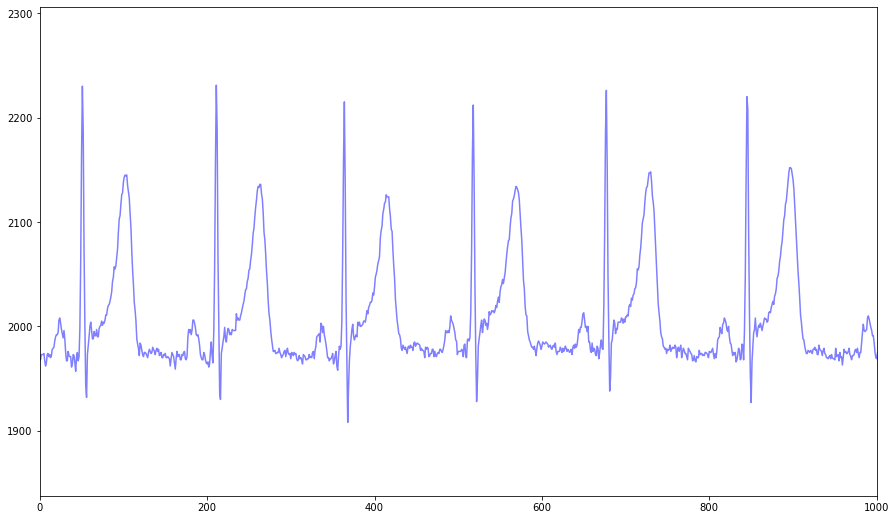

In [22]:
prepedf.plot_raw(ecg_signal[1], 1000)

#Liste anlegen aus Epochen und Stadienbezeichnung
list_of_stad_value = prepedf.list_of_stad_values(ecg_signal, cutpoints)
#del list_of_stad_value[:10]

In [23]:
print(len(list_of_stad_value))

52


In [24]:
segments = prepedf.segment_epochs(list_of_stad_value)

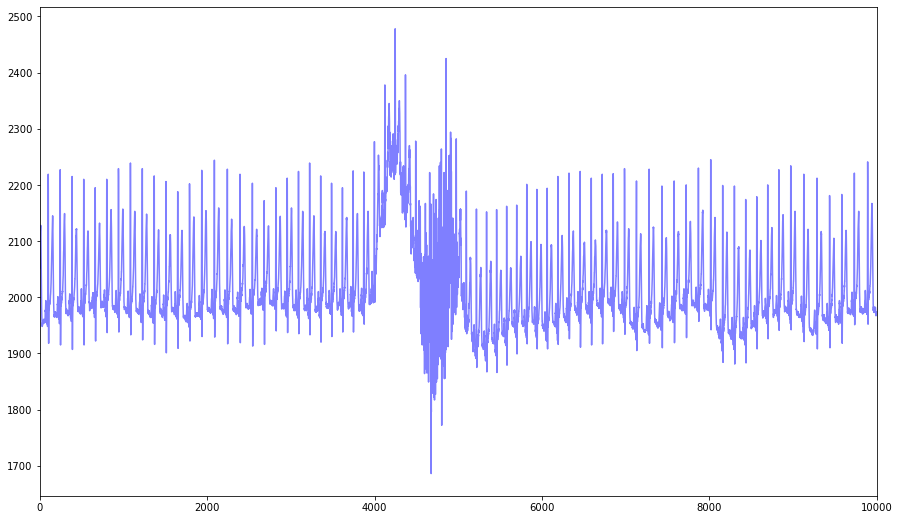

In [25]:
#zum überprüfen der Signalaufnahme auf tote Signale in den einzelnen Abschnitten
prepedf.plot_raw(segments[10]['values'],10000)

In [26]:
#prepedf.plot_compare_signals(segments[52]['values'], fs)

(<Figure size 1080x648 with 1 Axes>,
 {'ectopic': [1], 'missed': [], 'extra': [], 'longshort': []})

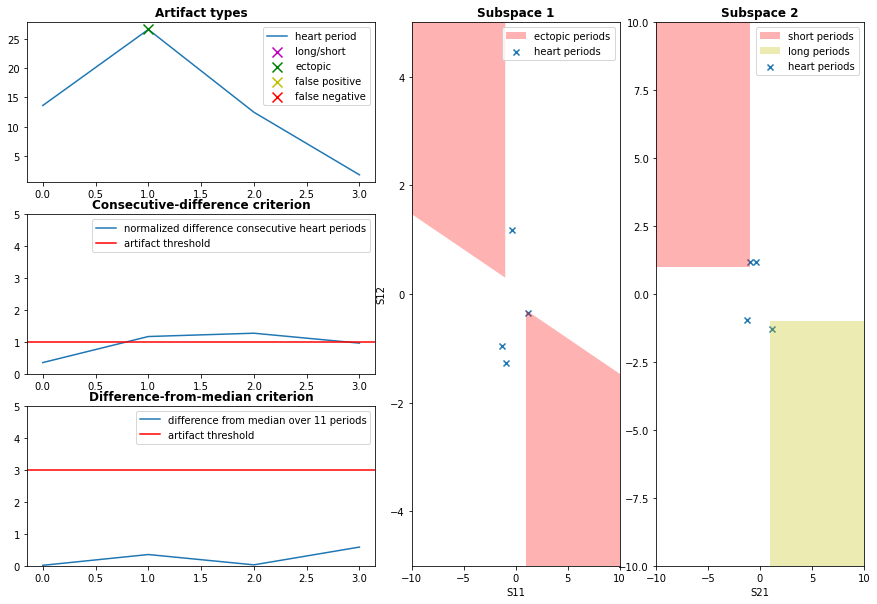

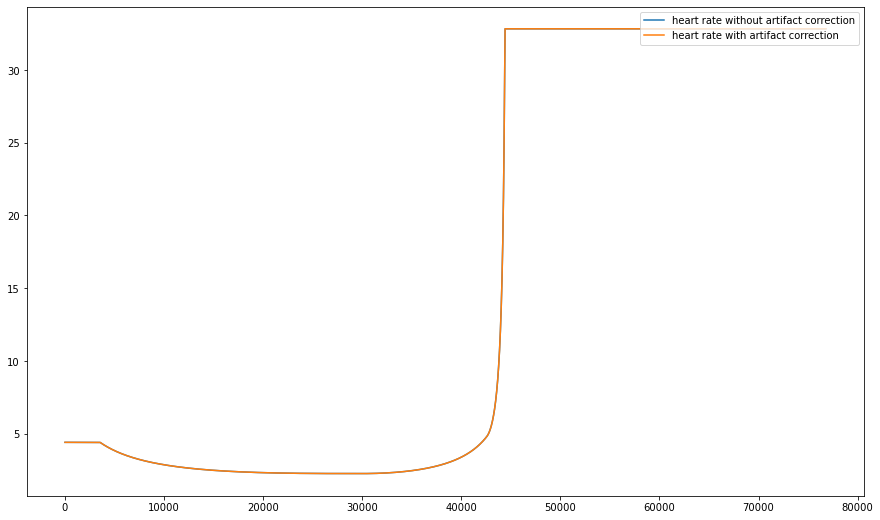

In [31]:
test = segments[3]['values']
#peaktest = test[42000:47000]
#for i in test:
 #   if i>70:
  #      test.pop()
len(test)
#sig = nk.signal_simulate(duration=20, sampling_rate=256, frequency=1)
prepedf.compare_peaks(test)

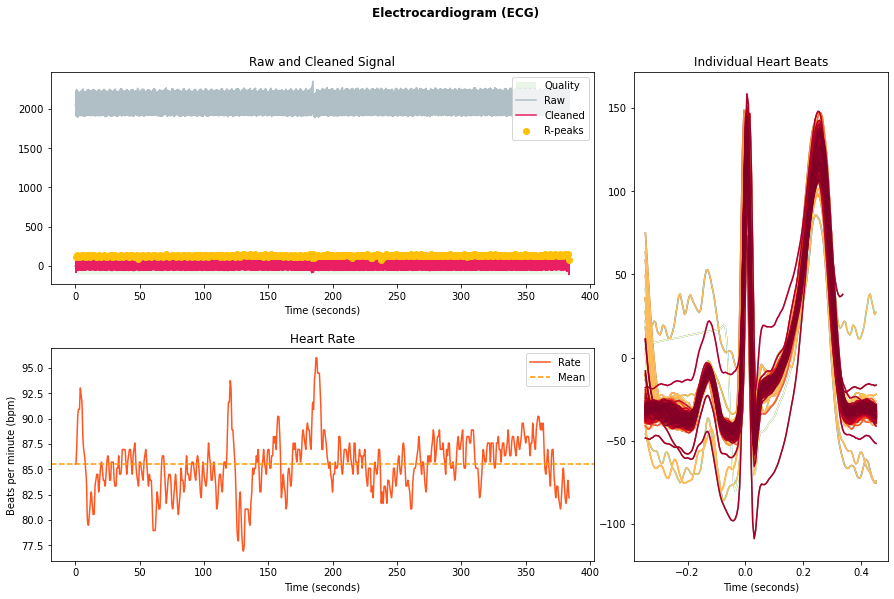

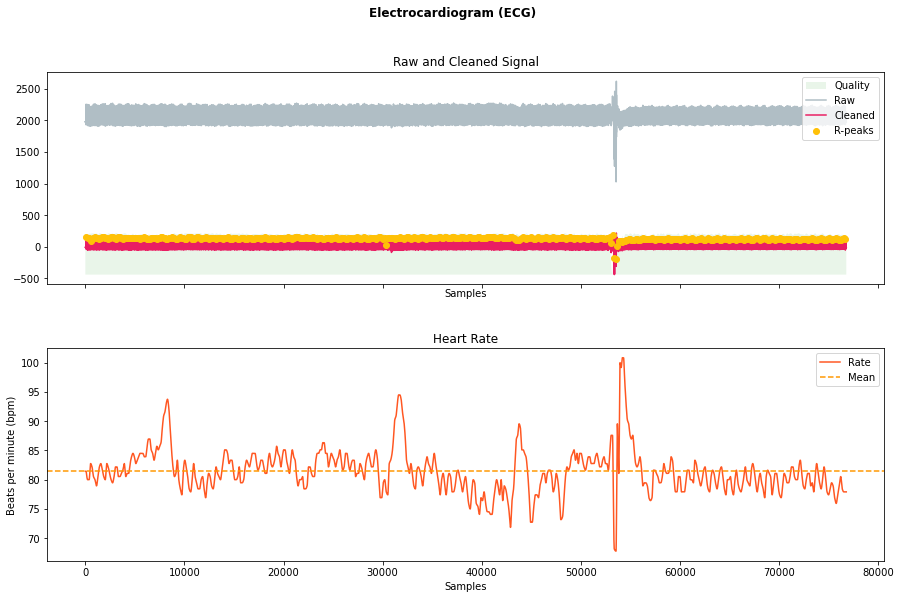

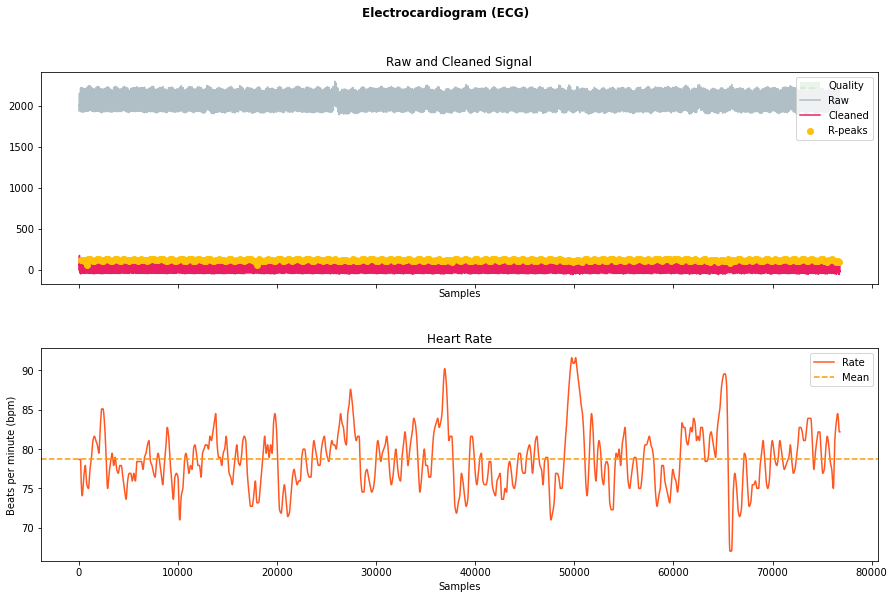

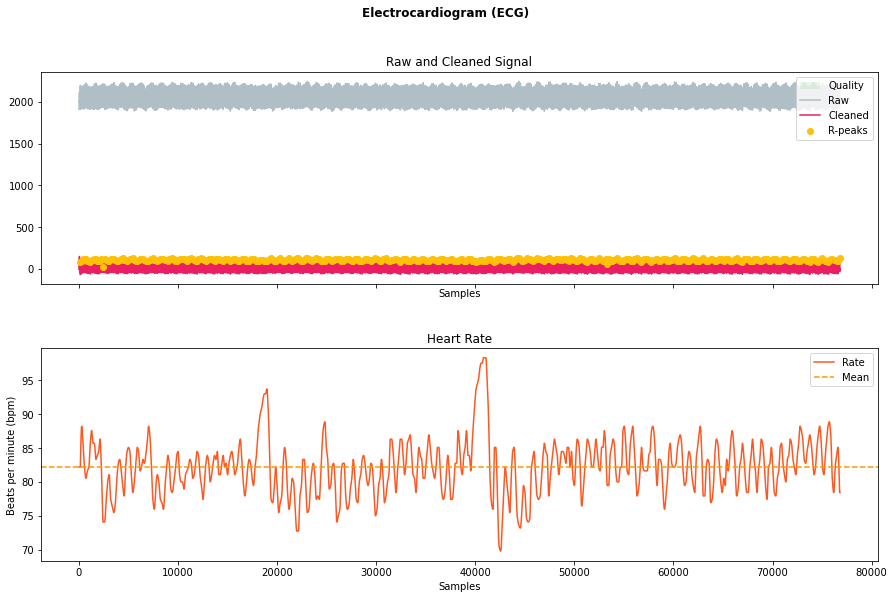

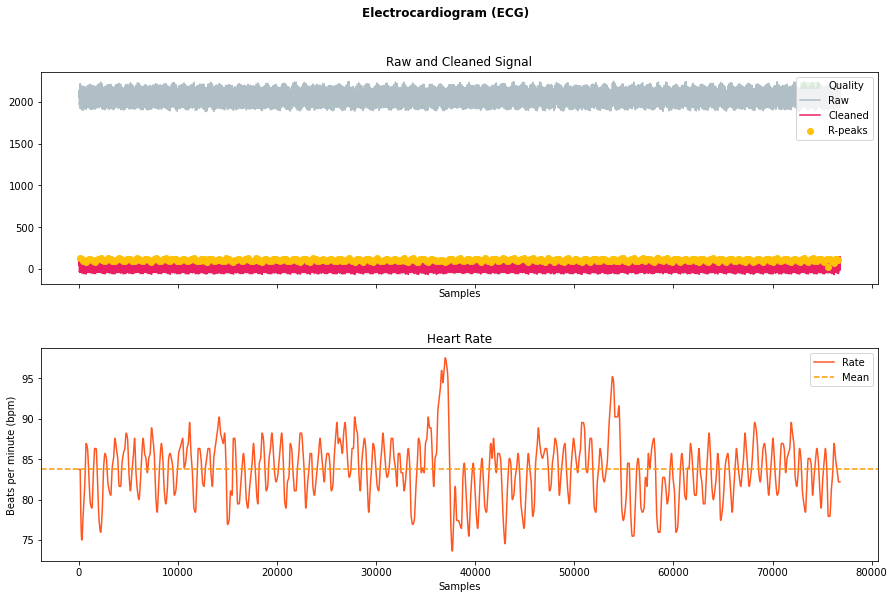

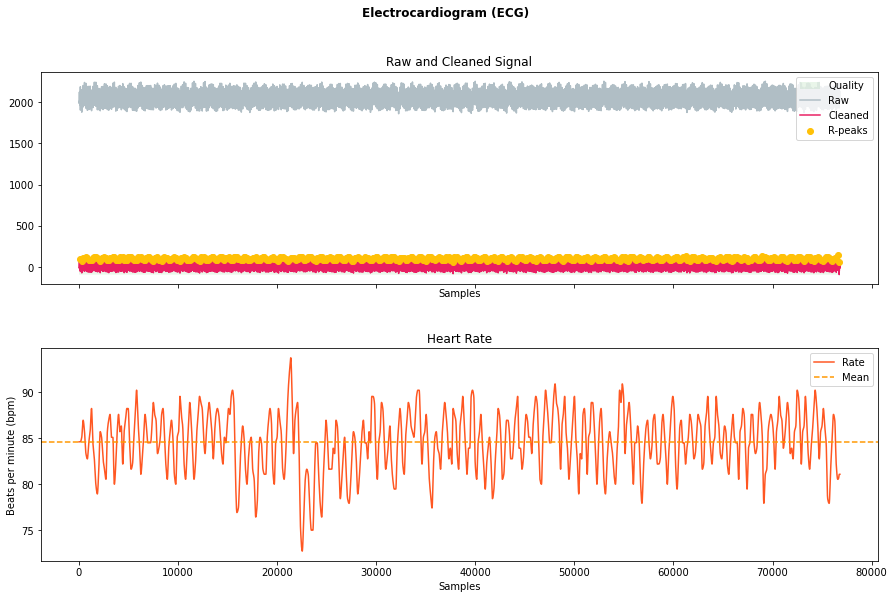

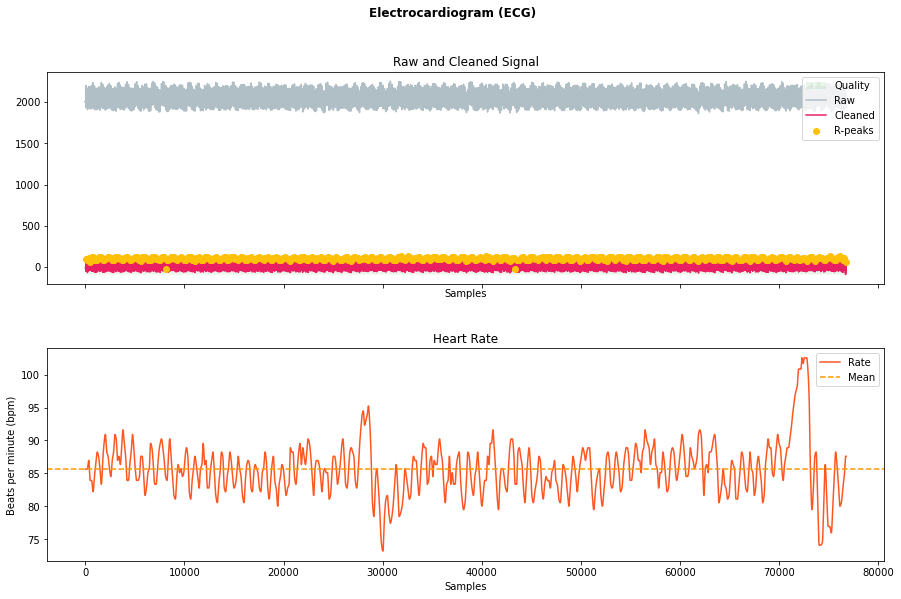

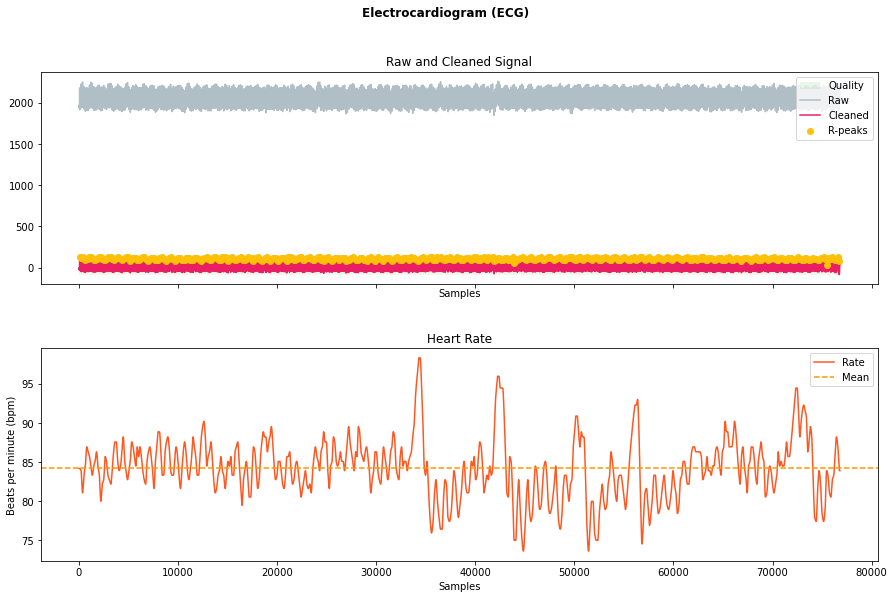

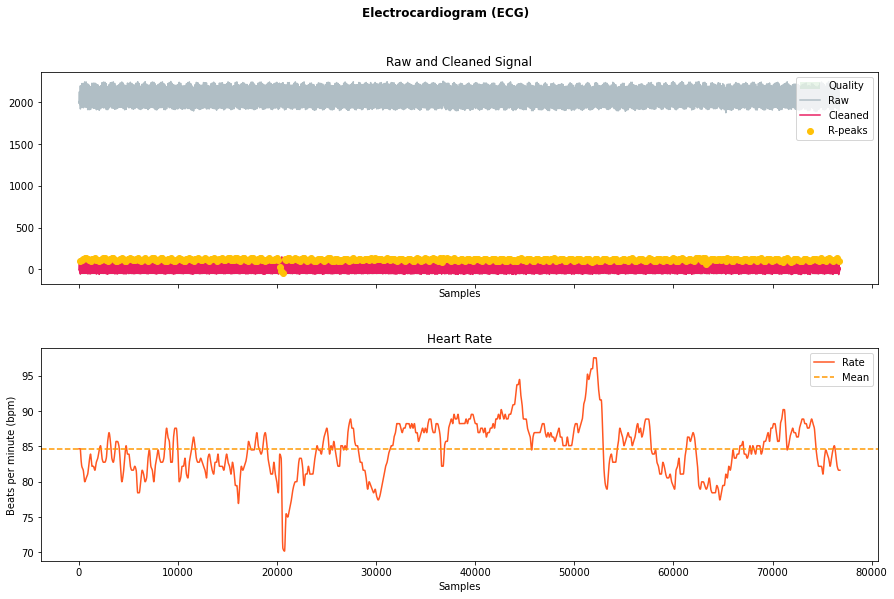

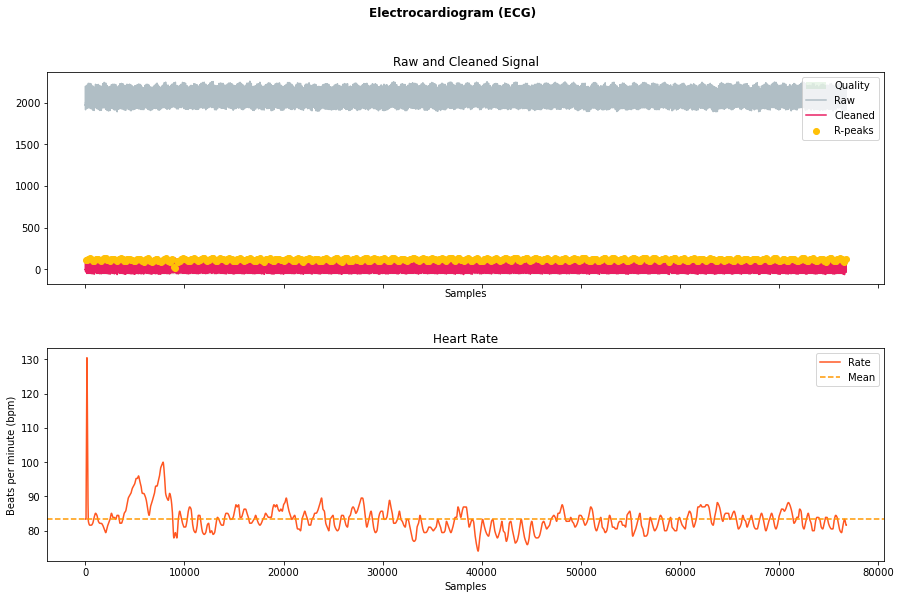

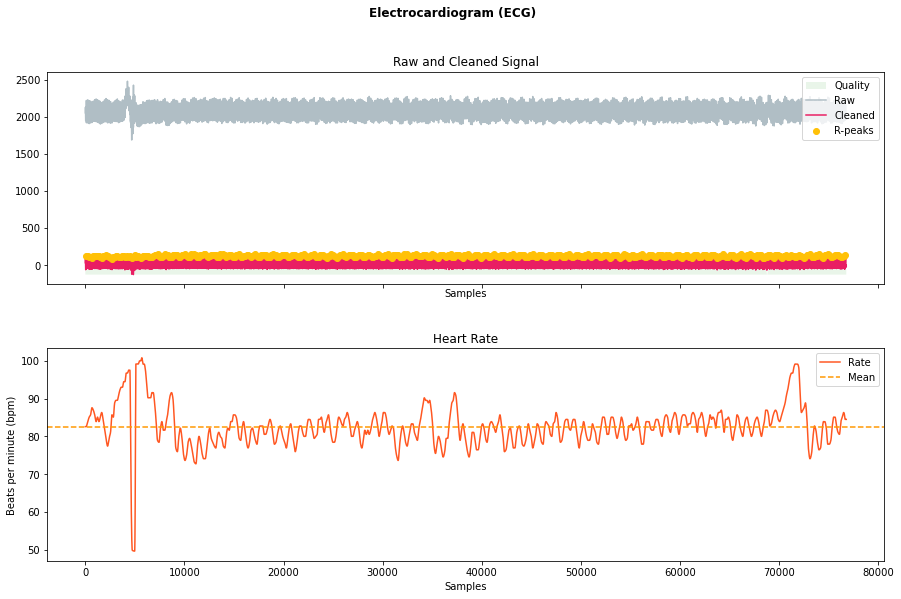

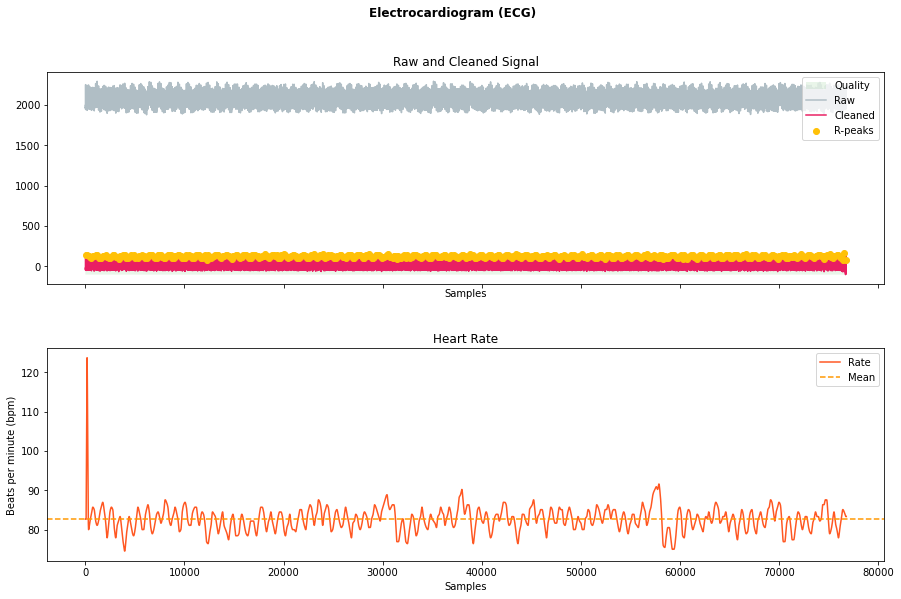

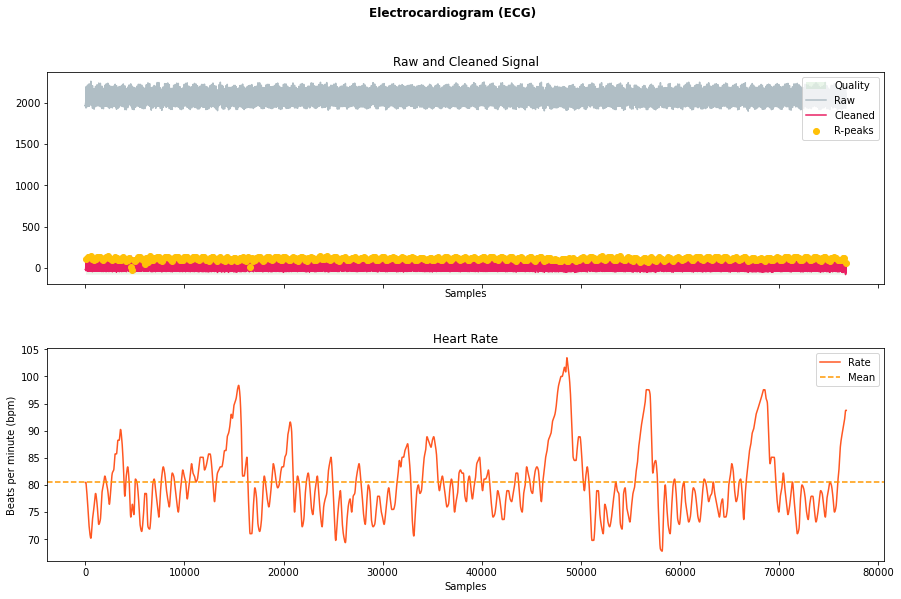

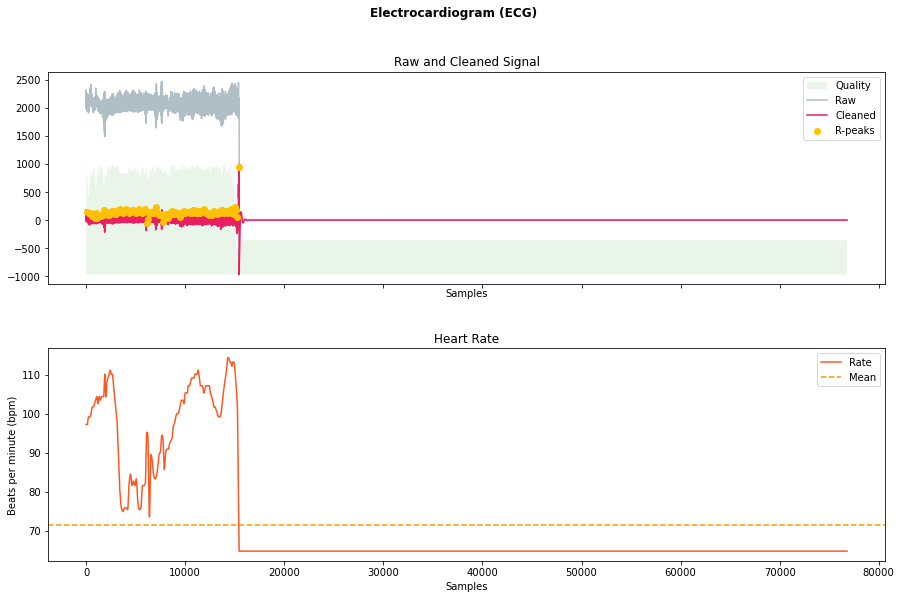

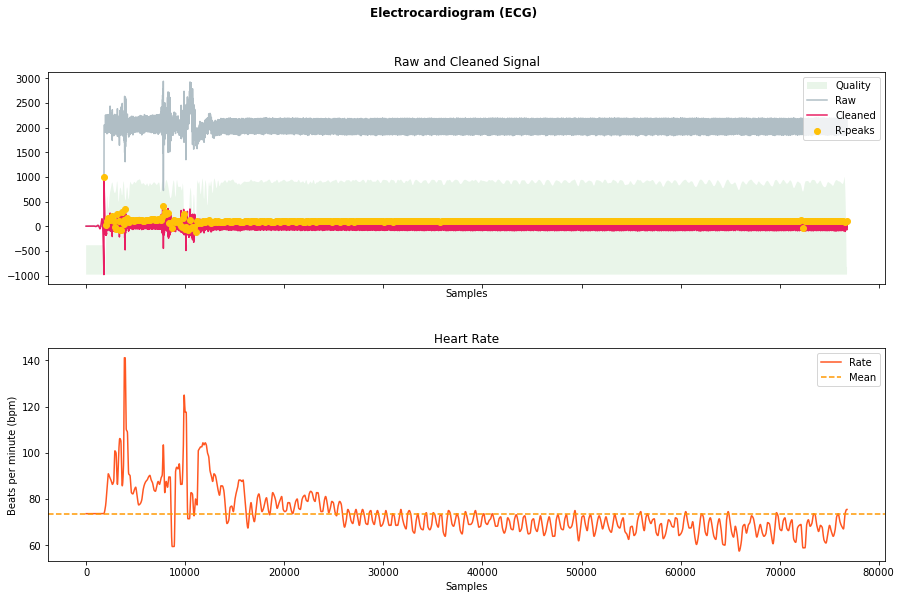

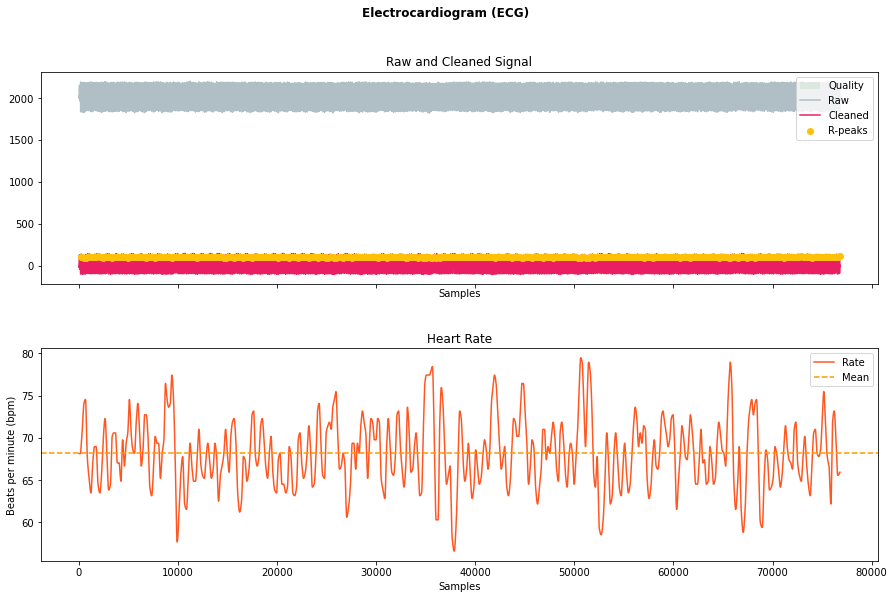

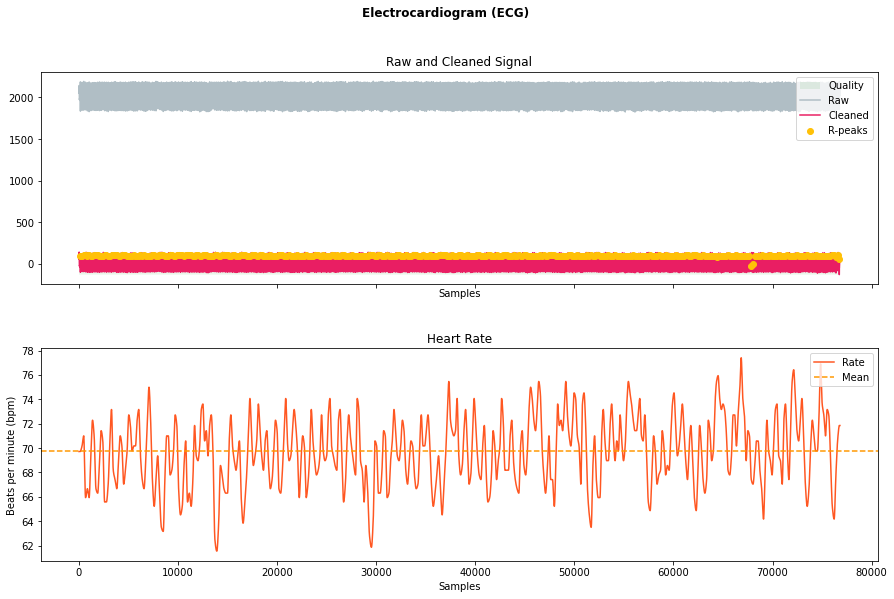

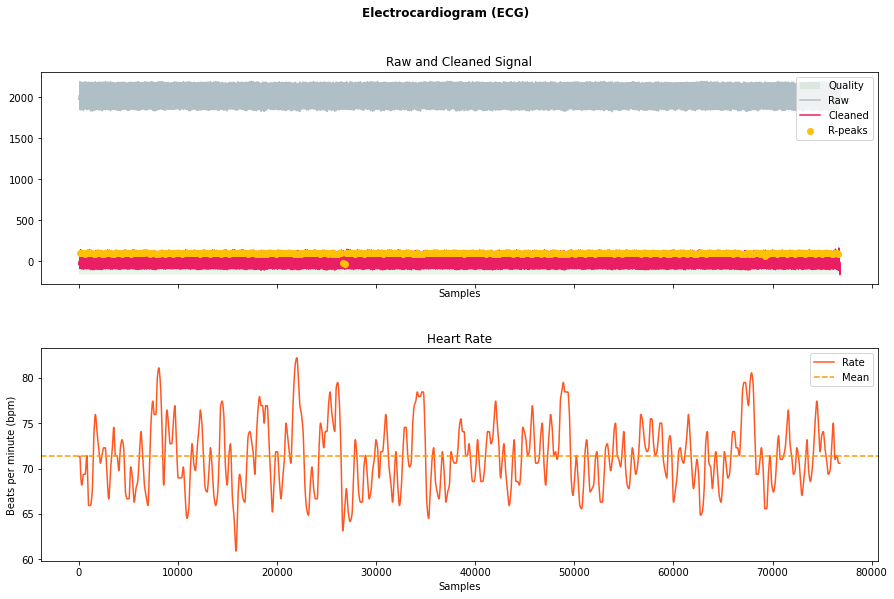

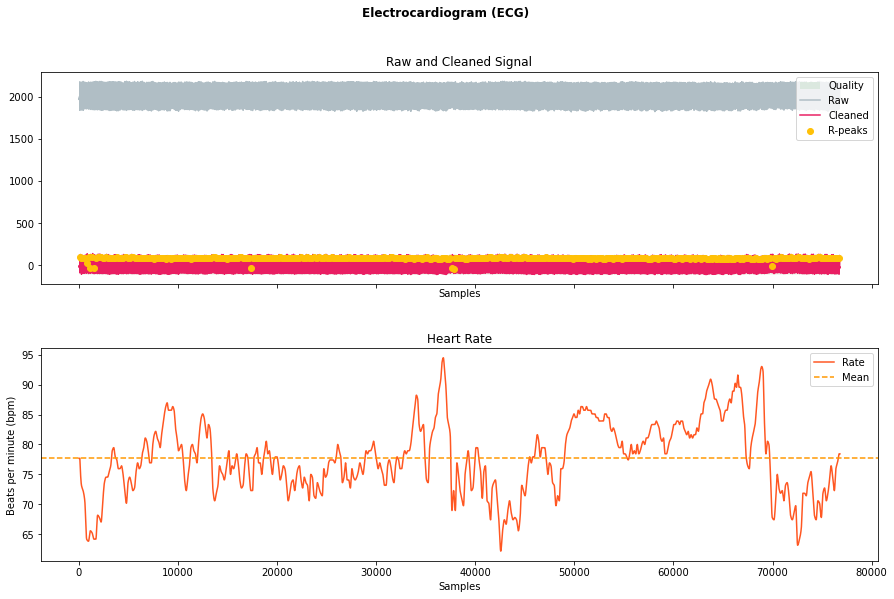

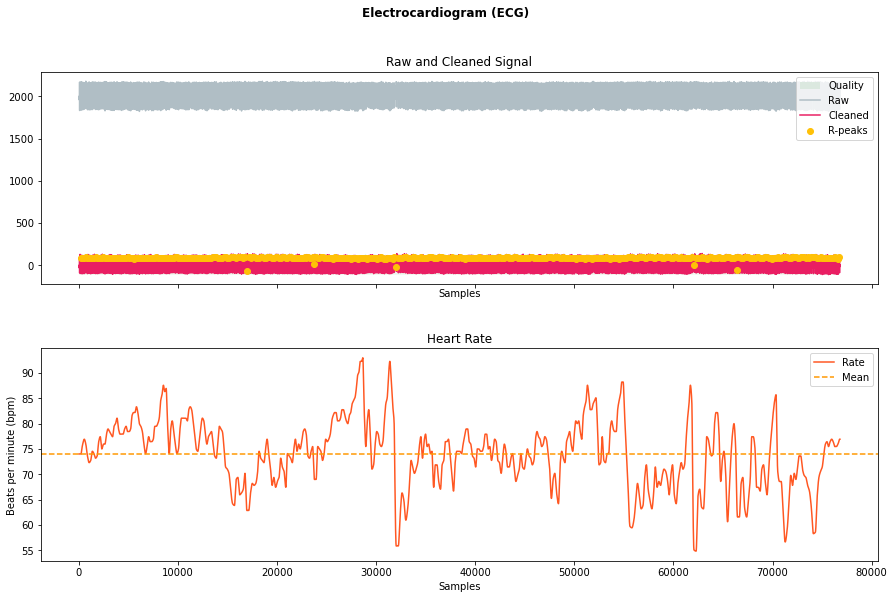

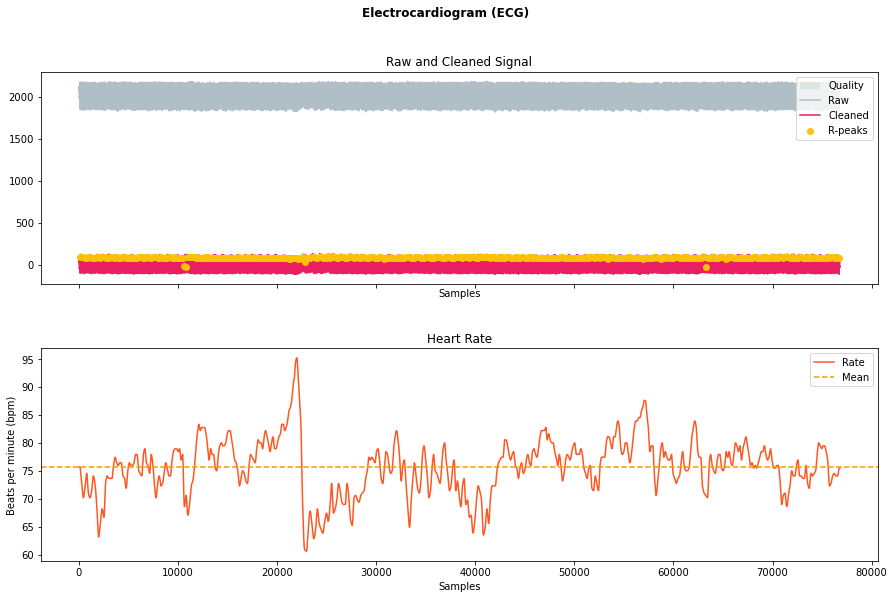

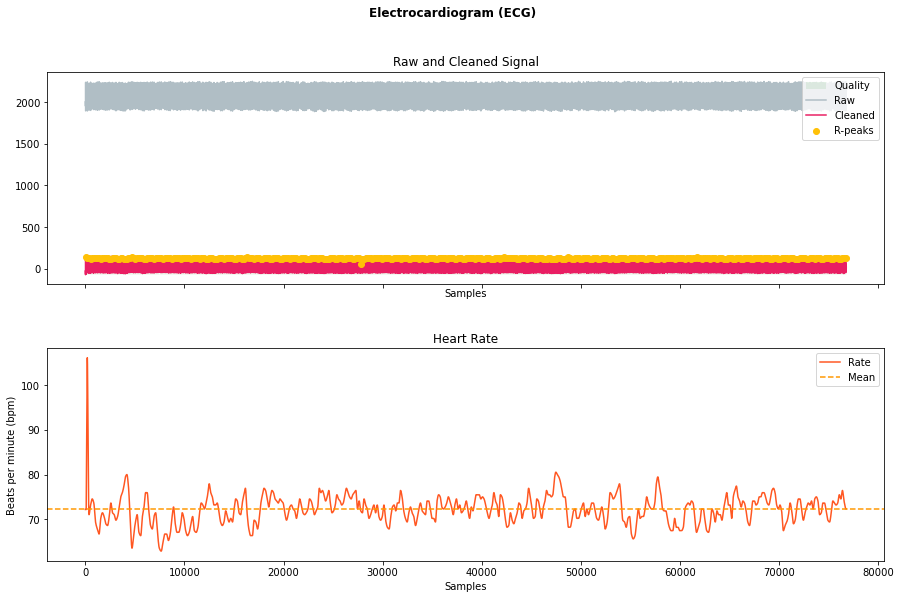

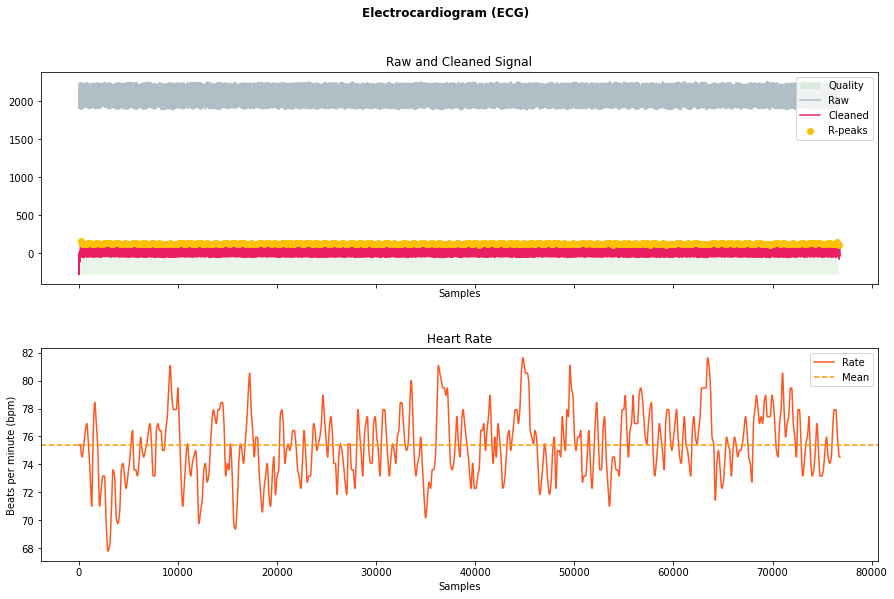

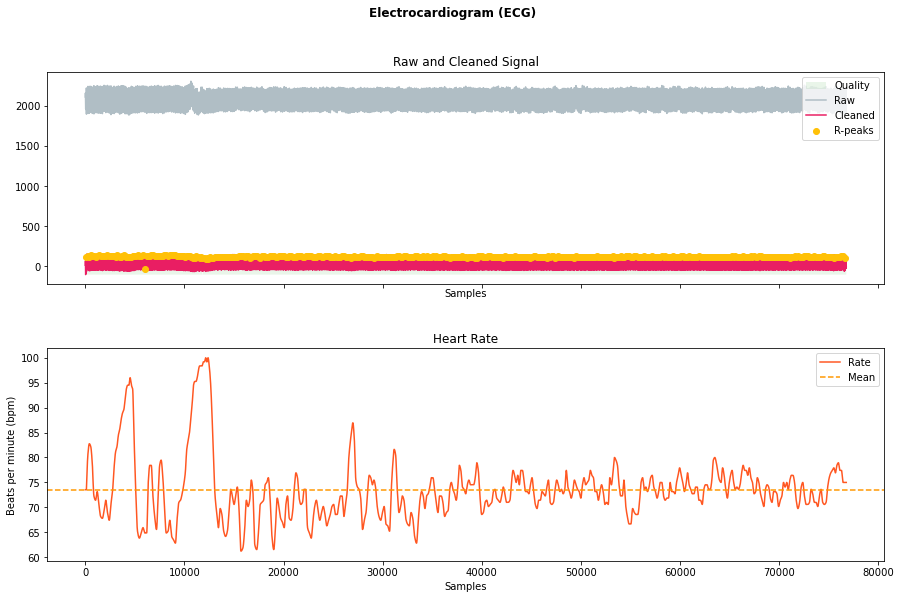

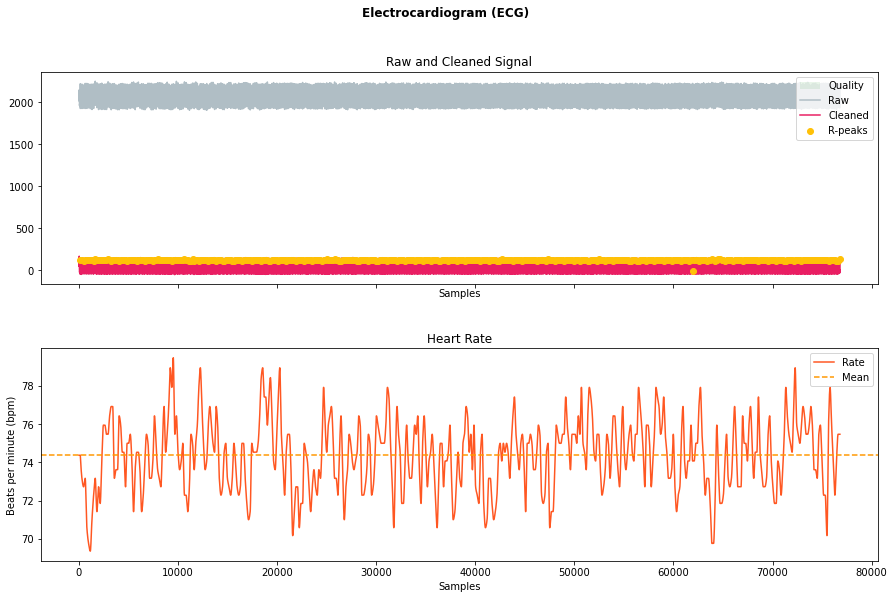

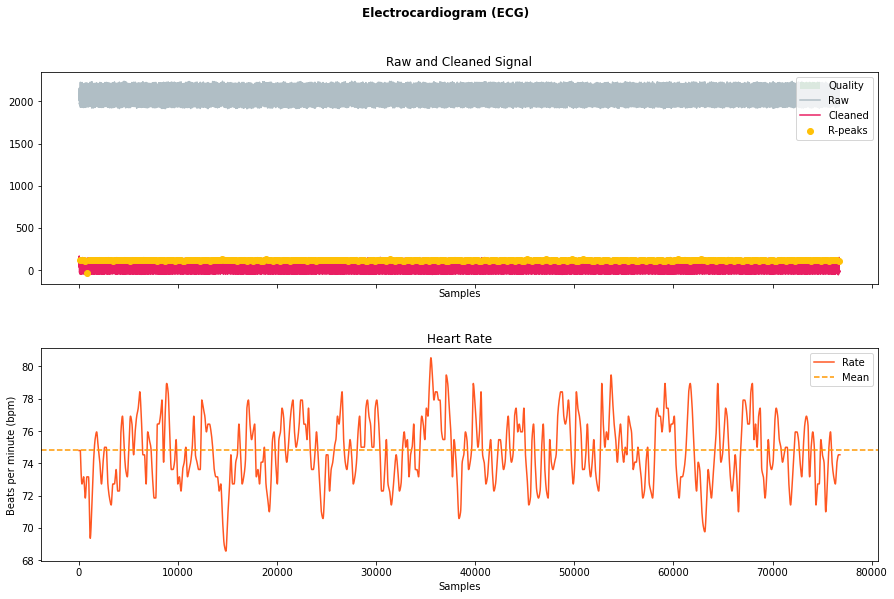

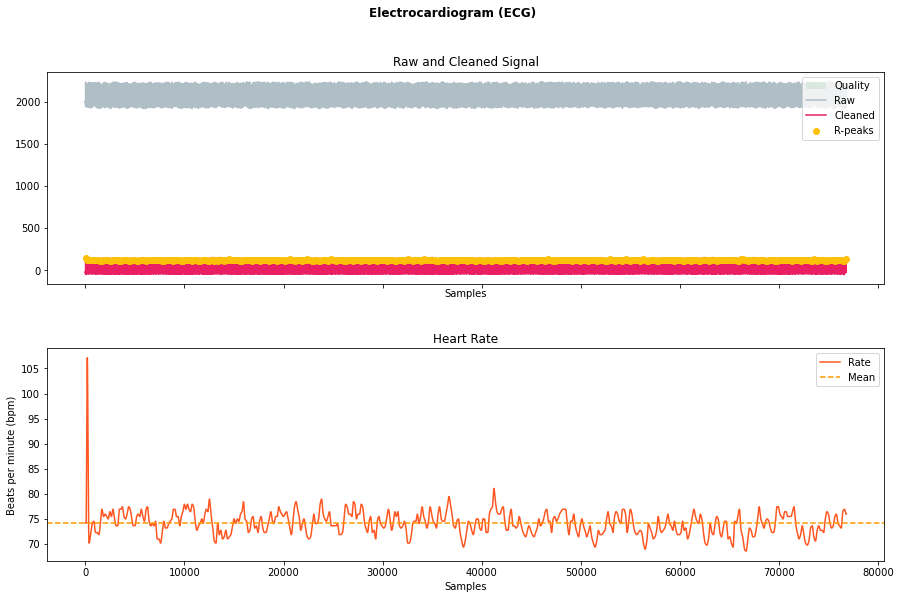

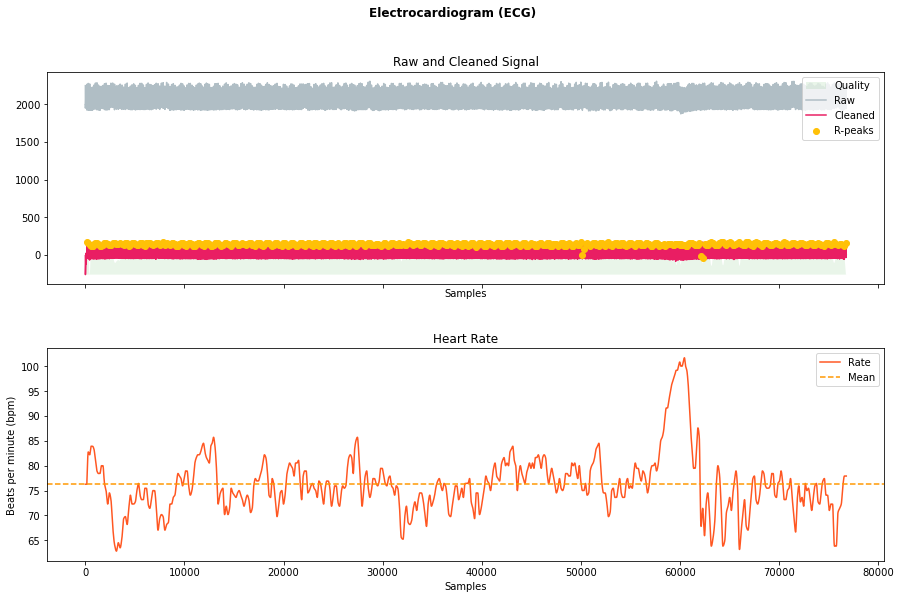

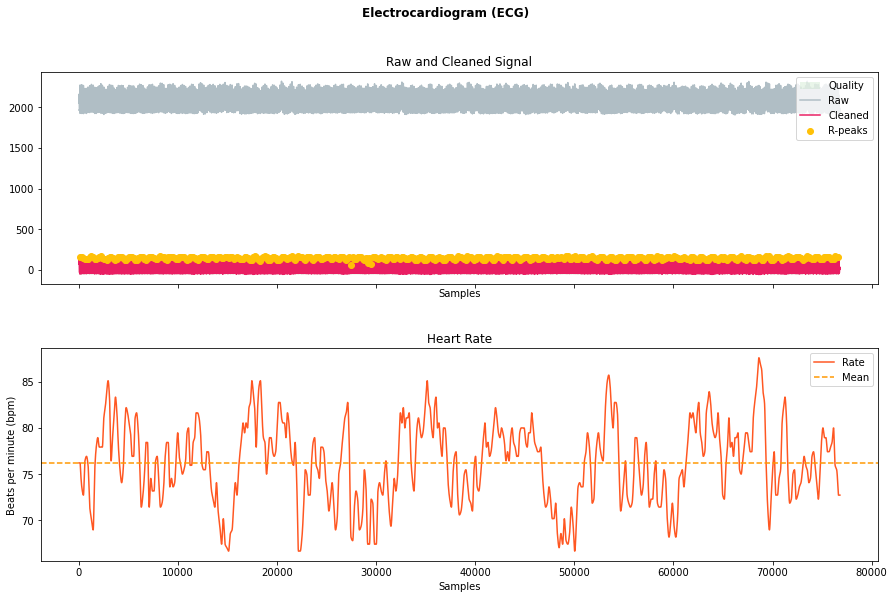

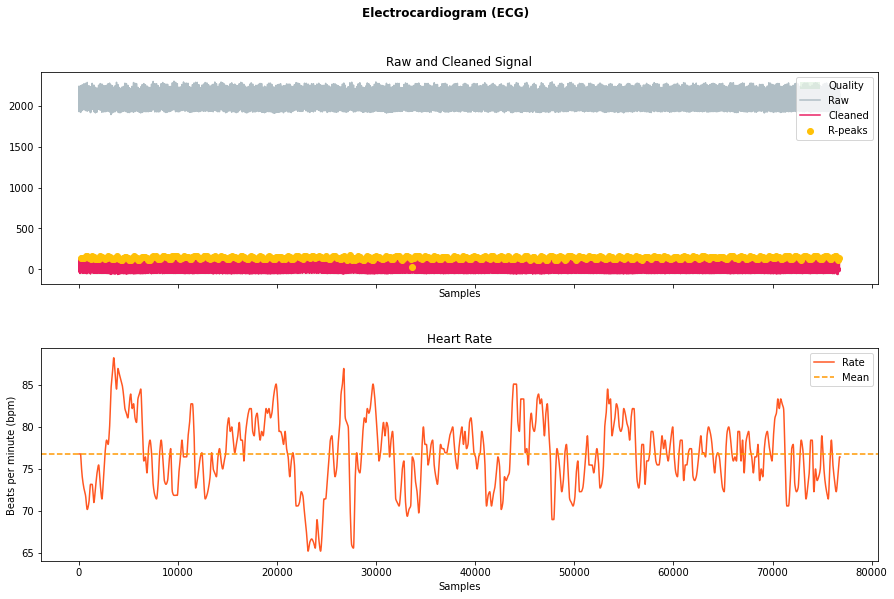

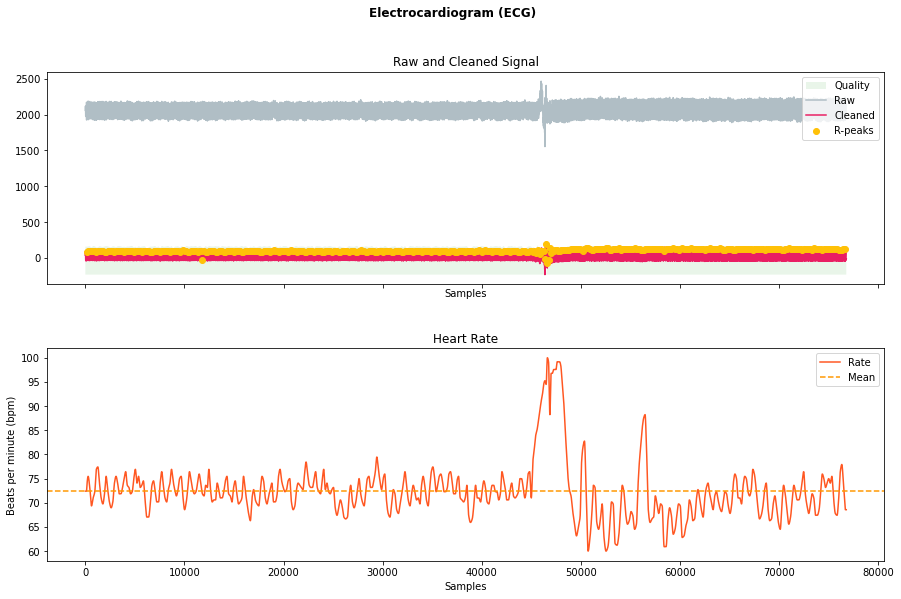

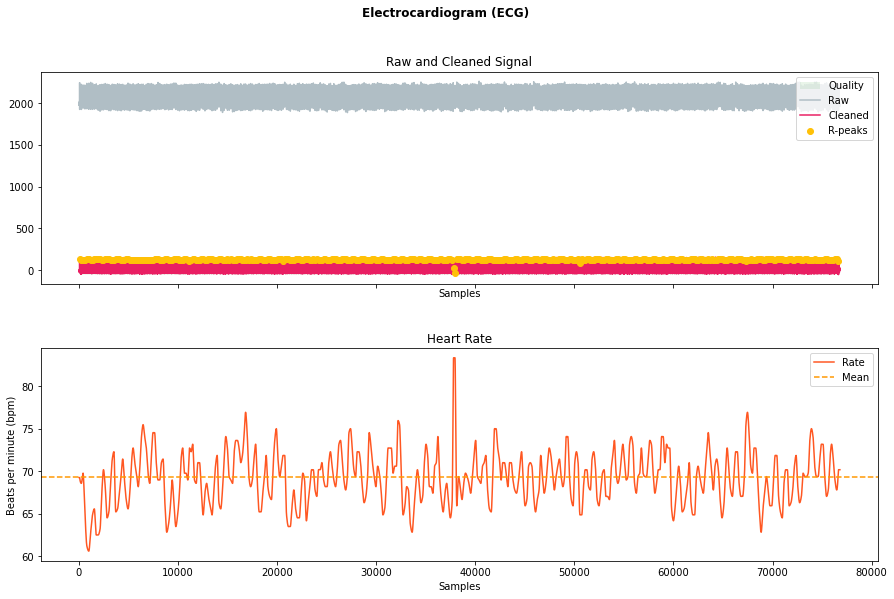

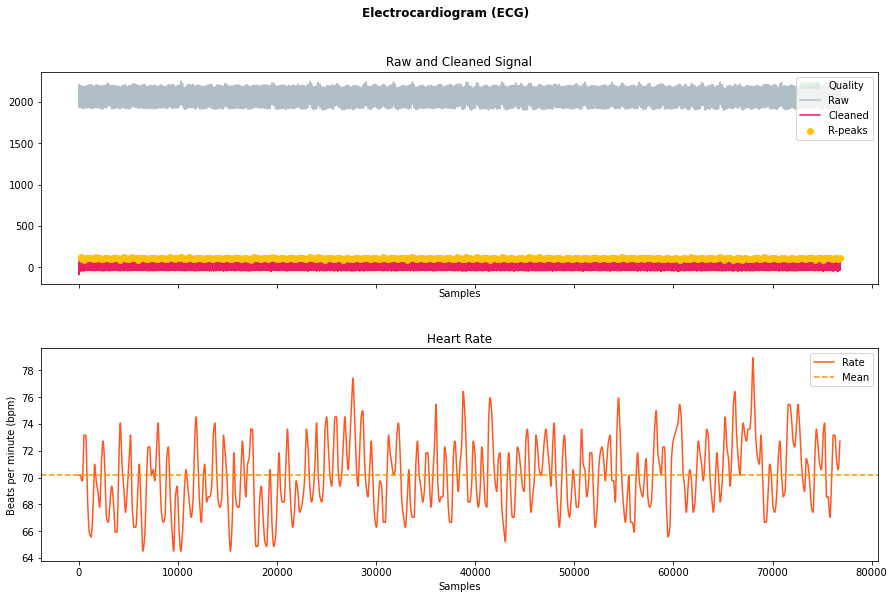

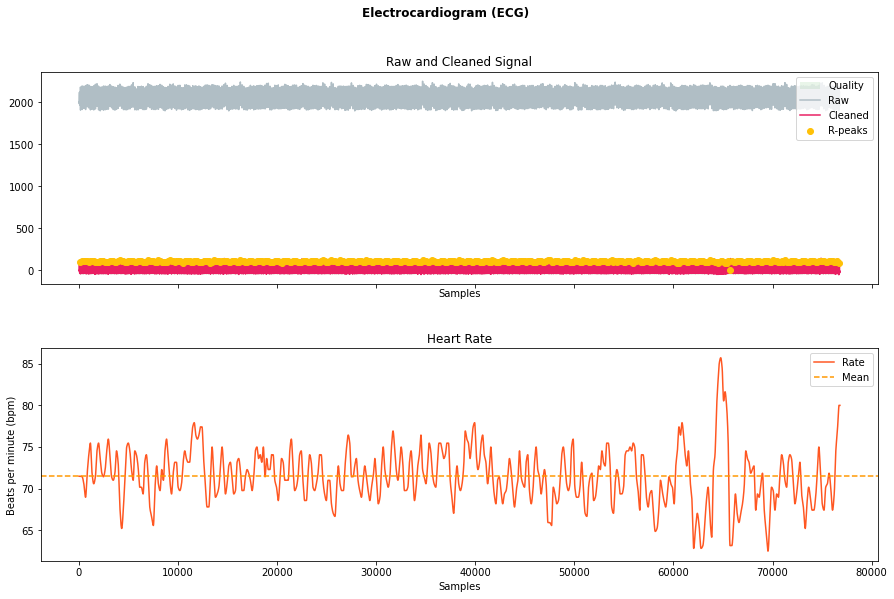

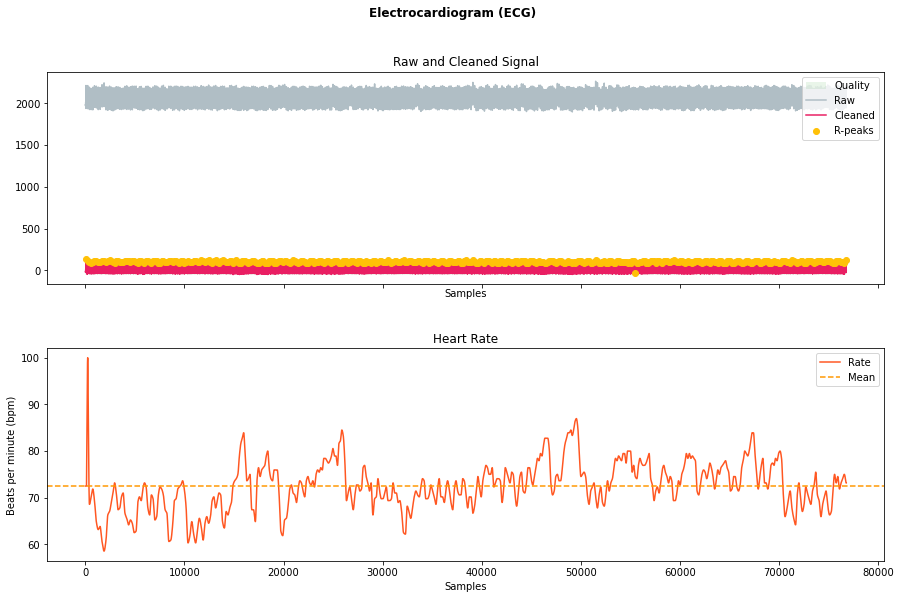

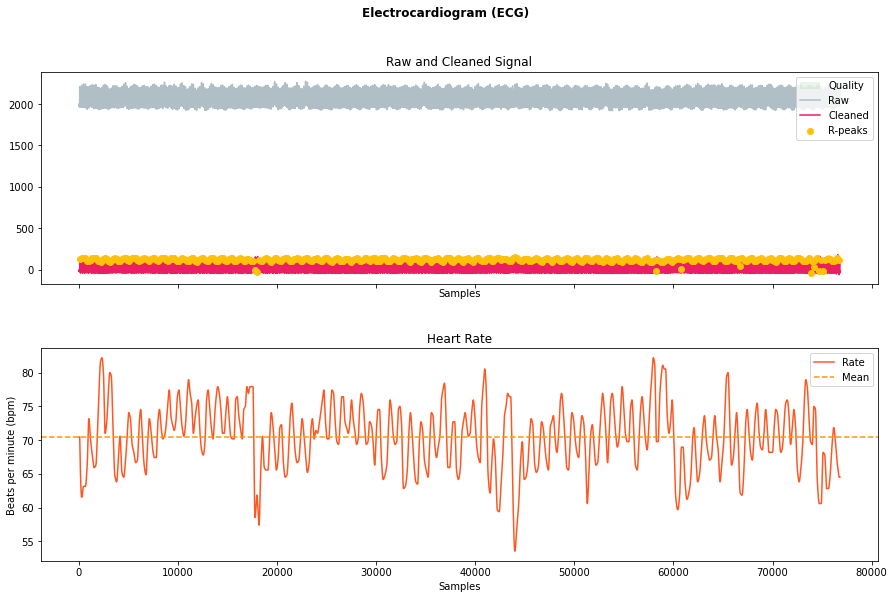

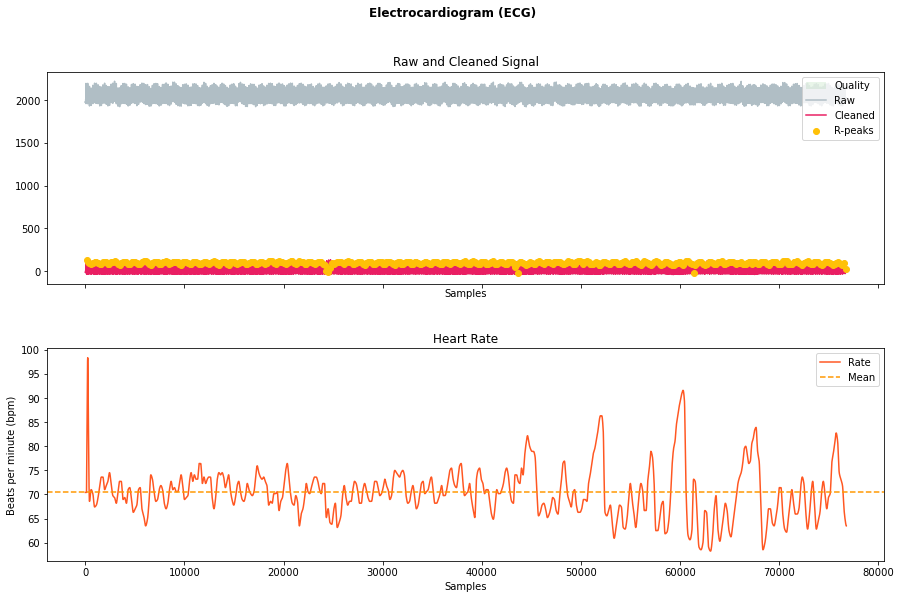

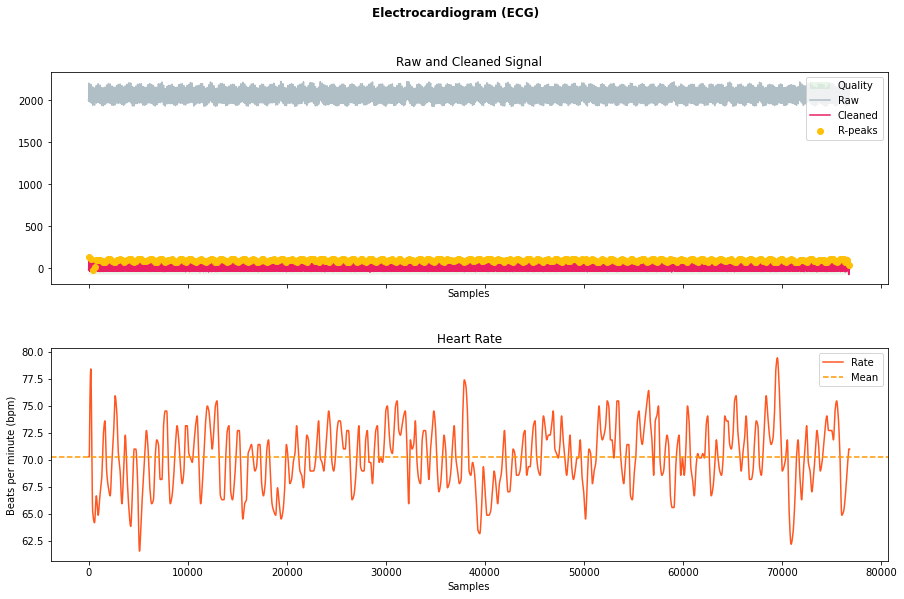

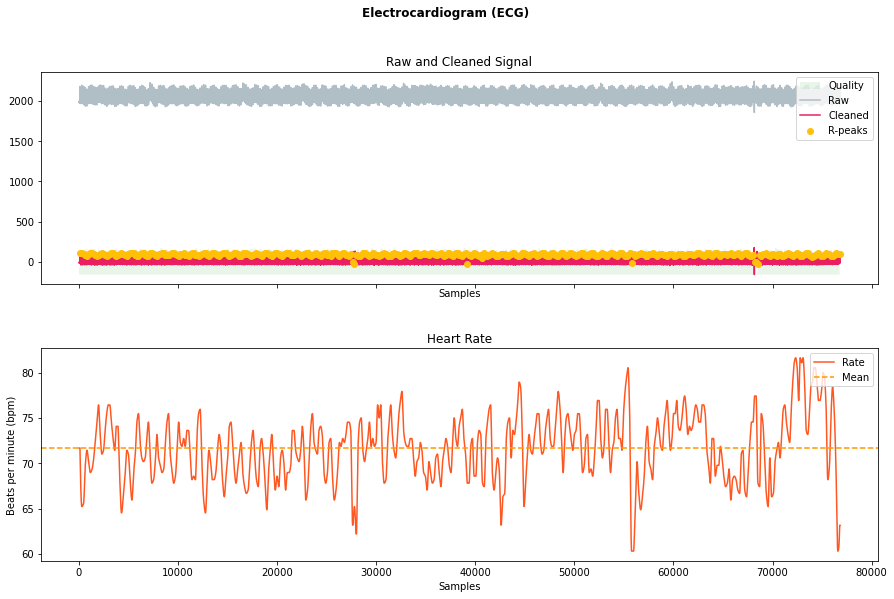

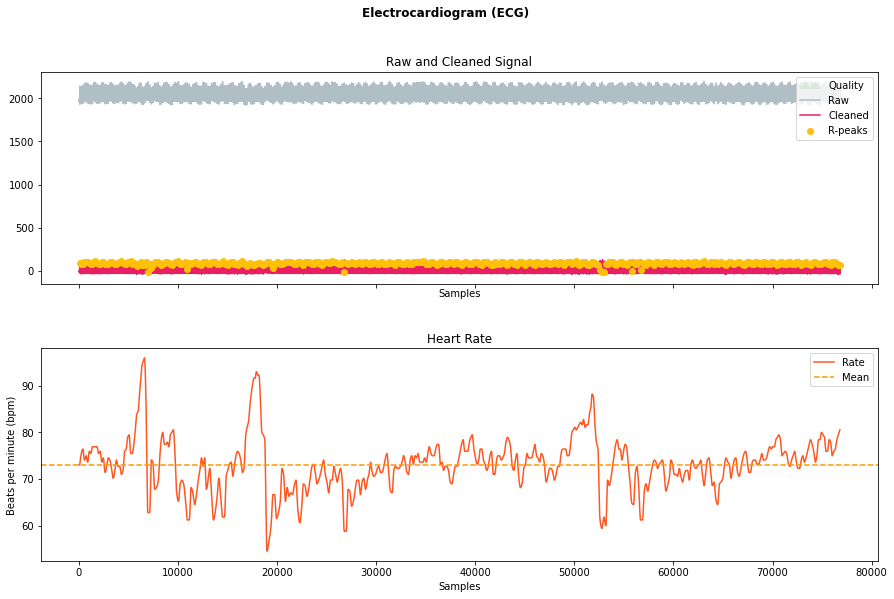

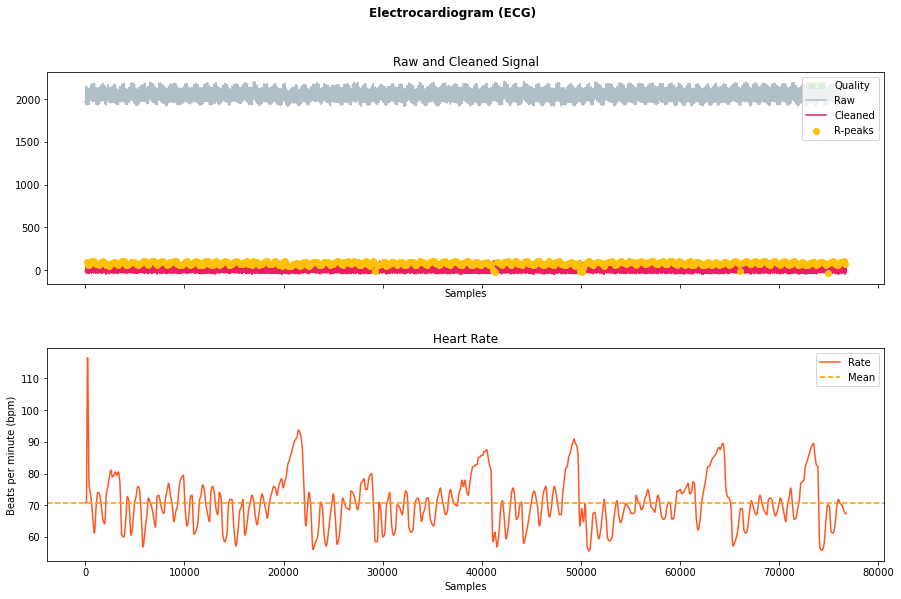

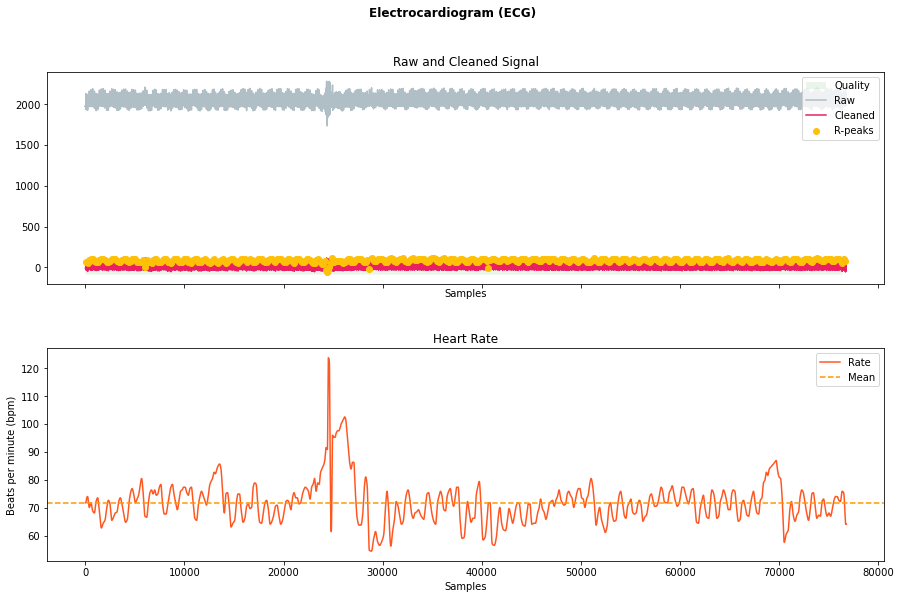

In [28]:
#results
hrv_results,hrv_process,hrv_info = prepedf.analyse_segments(idp, fs, segments, night, dia, True)
#testplot(segment)
#test_analyze(segment)

In [29]:
hrv_results

stadium  dia  idp  ECG_Rate_Mean  HRV_RMSSD  HRV_MeanNN   HRV_SDNN  \
0     Wach  NT1  000      85.516029  10.607683  701.648352  22.239996   
1     Wach  NT1  000      81.446804  21.012429  736.730769  33.683392   
2       N2  NT1  000      78.694054  20.466125  762.500000  35.381793   
3       N3  NT1  000      82.229707  24.013951  729.790476  35.531057   
4       N3  NT1  000      83.746745  23.095365  716.488764  31.222479   
5       N3  NT1  000      84.618581  22.931090  709.138889  27.022103   
6       N3  NT1  000      85.631928  20.487421  700.731261  31.728516   
7       N3  NT1  000      84.212422  18.272712  712.537175  32.131357   
8       N2  NT1  000      84.668113  12.207620  708.648148  31.007006   
9       N2  NT1  000      83.416431  18.459211  719.455910  31.096570   
10      N2  NT1  000      82.612417  41.506218  726.508539  49.771831   
11      N2  NT1  000      82.674335  21.740011  725.909091  26.305158   
12      N2  NT1  000      80.467817  26.719611  745.739300  57.024482   
13    Wach  NT1  000      71.417276  42.162095  617.217742  81.043255   
14    Wach  NT1  000      73.681855  55.110801  814.771739  98.828112   
15      N2  NT1  000      68.171457  44.328710  880.390805  52.068582   
16      N2  NT1  000      69.727431  30.816589  860.606742  34.894828   
17      N2  NT1  000      71.348974  30.208526  841.032967  42.296793   
18     Rem  NT1  000      77.688718  22.959120  772.368952  59.867556   
19     Rem  NT1  000      74.022164  43.787026  810.783898  73.781826   
20     Rem  NT1  000      75.680302  24.879377  792.877847  52.484928   
21      N2  NT1  000      72.184312  26.281296  831.420824  36.145670   
22      N3  NT1  000      75.398620  17.485113  795.810811  24.792211   
23      N2  NT1  000      73.551623  30.505884  815.906183  66.021556   
24      N3  NT1  000      74.377481  17.282402  806.726316  19.845629   
25      N3  NT1  000      74.800918  16.737594  802.159329  21.737833   
26      N3  NT1  000      74.198236  22.166008  808.818565  25.384502   
27     Rem  NT1  000      76.288310  28.527836  786.601643  58.958741   
28     Rem  NT1  000      76.218714  24.744051  787.253086  44.618841   
29     Rem  NT1  000      76.790915  23.437905  781.408163  42.237481   
30      N2  NT1  000      72.421401  33.480334  828.636364  62.984192   
31      N2  NT1  000      69.267482  32.784599  866.346154  37.957311   
32      N2  NT1  000      70.177592  27.572358  855.033482  31.689012   
33      N2  NT1  000      71.501124  27.833887  839.276316  38.106594   
34     Rem  NT1  000      72.510056  32.697949  827.710583  58.724229   
35      N2  NT1  000      70.477036  46.069933  851.577778  58.225997   
36      N2  NT1  000      70.461132  38.181812  851.911111  61.411686   
37      N2  NT1  000      70.306202  29.257935  853.552339  35.699609   
38      N2  NT1  000      71.689270  33.103511  837.128821  42.793571   
39     Rem  NT1  000      73.060355  37.797461  821.338330  64.065393   
40      N1  NT1  000      70.878557  62.314470  847.134956  91.756266   
41      N1  NT1  000      71.898028  56.410554  835.021786  83.787913   

     HRV_SDSD  HRV_CVNN  HRV_CVSD  ...    HRV_Ca  HRV_SDNNd  HRV_SDNNa  \
0   10.617106  0.031697  0.015118  ...  0.476064  16.096699  15.343703   
1   21.032666  0.045720  0.028521  ...  0.449015  25.013093  22.580214   
2   20.485957  0.046402  0.026841  ...  0.514577  24.643343  25.372582   
3   24.036350  0.048687  0.032905  ...  0.552503  23.757818  26.398495   
4   23.116687  0.043577  0.032234  ...  0.491387  22.210918  21.831543   
5   22.952299  0.038106  0.032337  ...  0.480487  19.482861  18.736801   
6   20.506190  0.045279  0.029237  ...  0.535811  21.634465  23.243666   
7   18.289749  0.045094  0.025645  ...  0.525457  22.154872  23.313099   
8   12.218956  0.043755  0.017227  ...  0.509827  21.716809  22.147926   
9   18.469339  0.043222  0.025657  ...  0.515100  20.950123  21.592651   
10  41.545728  0.068508  0.057131  ...  0.432018 

In [30]:
#Bereinigung von unbrauchbaren Abschnitten
selected = []
hrv_results_clean = prepedf.clean_df_from_bad_signal(hrv_results, idp, night, selected)
hrv_results_clean

stadium  dia  idp  ECG_Rate_Mean  HRV_RMSSD  HRV_MeanNN   HRV_SDNN  \
0     Wach  NT1  000      85.516029  10.607683  701.648352  22.239996   
1     Wach  NT1  000      81.446804  21.012429  736.730769  33.683392   
2       N2  NT1  000      78.694054  20.466125  762.500000  35.381793   
3       N3  NT1  000      82.229707  24.013951  729.790476  35.531057   
4       N3  NT1  000      83.746745  23.095365  716.488764  31.222479   
5       N3  NT1  000      84.618581  22.931090  709.138889  27.022103   
6       N3  NT1  000      85.631928  20.487421  700.731261  31.728516   
7       N3  NT1  000      84.212422  18.272712  712.537175  32.131357   
8       N2  NT1  000      84.668113  12.207620  708.648148  31.007006   
9       N2  NT1  000      83.416431  18.459211  719.455910  31.096570   
10      N2  NT1  000      82.612417  41.506218  726.508539  49.771831   
11      N2  NT1  000      82.674335  21.740011  725.909091  26.305158   
12      N2  NT1  000      80.467817  26.719611  745.739300  57.024482   
13    Wach  NT1  000      71.417276  42.162095  617.217742  81.043255   
14    Wach  NT1  000      73.681855  55.110801  814.771739  98.828112   
15      N2  NT1  000      68.171457  44.328710  880.390805  52.068582   
16      N2  NT1  000      69.727431  30.816589  860.606742  34.894828   
17      N2  NT1  000      71.348974  30.208526  841.032967  42.296793   
18     Rem  NT1  000      77.688718  22.959120  772.368952  59.867556   
19     Rem  NT1  000      74.022164  43.787026  810.783898  73.781826   
20     Rem  NT1  000      75.680302  24.879377  792.877847  52.484928   
21      N2  NT1  000      72.184312  26.281296  831.420824  36.145670   
22      N3  NT1  000      75.398620  17.485113  795.810811  24.792211   
23      N2  NT1  000      73.551623  30.505884  815.906183  66.021556   
24      N3  NT1  000      74.377481  17.282402  806.726316  19.845629   
25      N3  NT1  000      74.800918  16.737594  802.159329  21.737833   
26      N3  NT1  000      74.198236  22.166008  808.818565  25.384502   
27     Rem  NT1  000      76.288310  28.527836  786.601643  58.958741   
28     Rem  NT1  000      76.218714  24.744051  787.253086  44.618841   
29     Rem  NT1  000      76.790915  23.437905  781.408163  42.237481   
30      N2  NT1  000      72.421401  33.480334  828.636364  62.984192   
31      N2  NT1  000      69.267482  32.784599  866.346154  37.957311   
32      N2  NT1  000      70.177592  27.572358  855.033482  31.689012   
33      N2  NT1  000      71.501124  27.833887  839.276316  38.106594   
34     Rem  NT1  000      72.510056  32.697949  827.710583  58.724229   
35      N2  NT1  000      70.477036  46.069933  851.577778  58.225997   
36      N2  NT1  000      70.461132  38.181812  851.911111  61.411686   
37      N2  NT1  000      70.306202  29.257935  853.552339  35.699609   
38      N2  NT1  000      71.689270  33.103511  837.128821  42.793571   
39     Rem  NT1  000      73.060355  37.797461  821.338330  64.065393   
40      N1  NT1  000      70.878557  62.314470  847.134956  91.756266   
41      N1  NT1  000      71.898028  56.410554  835.021786  83.787913   

     HRV_SDSD  HRV_CVNN  HRV_CVSD  ...    HRV_Ca  HRV_SDNNd  HRV_SDNNa  \
0   10.617106  0.031697  0.015118  ...  0.476064  16.096699  15.343703   
1   21.032666  0.045720  0.028521  ...  0.449015  25.013093  22.580214   
2   20.485957  0.046402  0.026841  ...  0.514577  24.643343  25.372582   
3   24.036350  0.048687  0.032905  ...  0.552503  23.757818  26.398495   
4   23.116687  0.043577  0.032234  ...  0.491387  22.210918  21.831543   
5   22.952299  0.038106  0.032337  ...  0.480487  19.482861  18.736801   
6   20.506190  0.045279  0.029237  ...  0.535811  21.634465  23.243666   
7   18.289749  0.045094  0.025645  ...  0.525457  22.154872  23.313099   
8   12.218956  0.043755  0.017227  ...  0.509827  21.716809  22.147926   
9   18.469339  0.043222  0.025657  ...  0.515100  20.950123  21.592651   
10  41.545728  0.068508  0.057131  ...  0.432018 